# Direct approximate Algorithm
The direct algorithm fares well with randomly generated point clouds, as shown below, and provides a guarantee that it encompasses the point cloud. Its computational complexity is $O(n)$ because it must find the two points in the cloud farthest away from each other. However, it gives only an approximate solution and does not find the unique global soluton every time.

In [1]:
import matplotlib.pyplot as plt

from start import create_curve_for
from vector_ops import generate_random_points
from Circle import Circle

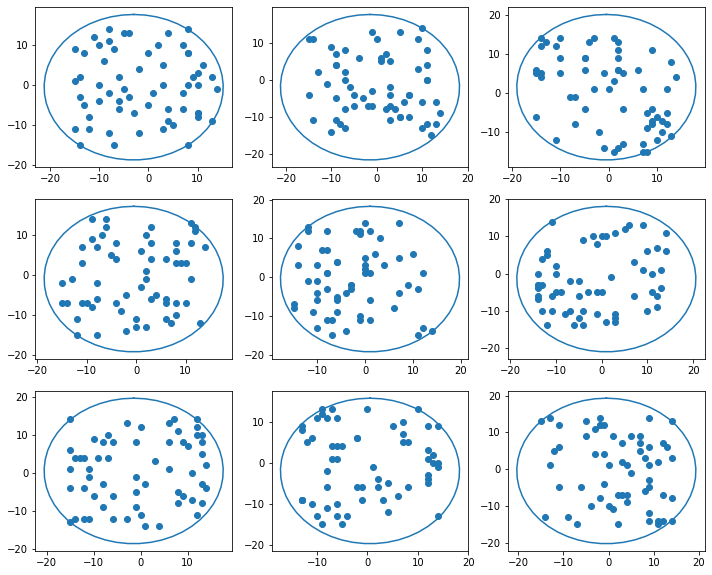

In [2]:
fig = plt.figure(figsize=(12, 10))
for i in range(1, 10):
    points = generate_random_points(i)
    circle = Circle.guaranteed_to_encompass(points)
    curve = create_curve_for(circle)
    ax = plt.subplot(3,3,i)
    ax.scatter(*points.T)
    ax.plot(*curve)
plt.show()

## Guarantee of encompassing the point cloud
**Lemma:** Let $(p_1, p_2, ..., p_m)$ be a point cloud and let $d$ be the distance between the two points $p_{d1}$, $p_{d2}$ most distant to each other. Then a circle $C$ is guaranteed to encompass the point cloud if:
* It is centered between the two points $p_{d_1}$, $p_{d_2}$.
* Its radius is $\sqrt{0.5} d$

**Proof**: Let $S_1$ be the set of points at most as far away from $p_{d_1}$ as $p_{d_2}$. And $S_2$ be the set of points at most as far away from $p_{d_2}$ as $p_{d_1}$. The intersection of $S_1$ and $S_2$ is at most $\sqrt{0.5}d$ from the centerpoint between $p_{d_2}$ and $p_{d_1}$. Assuming that a point $p_c$ could lie 
outside this radius would contradict that $p_{d_1}$ and $p_{d_2}$ are the most distant points in the cloud, so no such point can exist.

## Non-Optimality
**Remark**: While this method finds a circle that guarantees to contain the point cloud, we can see it is not optimal below. The optimal solution can be found by solving a 3-dim convex problem over the set of points S.
$$\min r $$
$$s.t. || (c_1, c_2) - (p_1, p_2)_i || \leq r \quad \forall i\in S$$
However, a quick google search did not yield python library that accepted convex constraints. More thorough research is necessary.

In [3]:
from start import load_example_points

points = load_example_points()
circle = Circle.guaranteed_to_encompass(points)
curve = create_curve_for(circle)

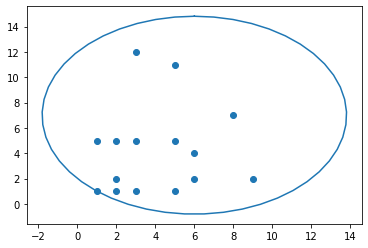

In [4]:
plt.scatter(*points.T)
plt.plot(*curve)